In [46]:
#importing the requried python package 
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import PIL

In [47]:
#Reading the netCDF4 precipitation and temperature dataset from the directory
data_temp = Dataset(r'C:\Users\Naveen Yoganandam\Projects\Temperature\data\Temperature_data_2011_2020.nc')

In [48]:
#Accessing the variables and declaring the new variables
lat_temp = data_temp.variables['lat'][:]
long_temp = data_temp.variables['lon'][:]
time_temp = data_temp.variables['time'][:]
temp = data_temp.variables['tmp'][:]

C:\Users\NAVEEN~1\AppData\Local\Temp/ipykernel_4920/750401971.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme_temp = mp_temp.pcolor(x, y, np.squeeze(temp[0,:,:]), cmap = 'jet')


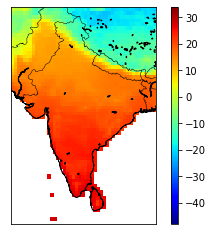

In [49]:
#Declaring the preciptation map by the matpltlib basemap package
mp_temp = Basemap(projection = 'merc',
             llcrnrlon = 66.611474,
             llcrnrlat = 3.695643,
             urcrnrlon = 90.644330,
             urcrnrlat = 36.758681,
             resolution = 'i')

lon, lat = np.meshgrid(long_temp,lat_temp)
x,y = mp_temp(lon, lat)

#Declaring the colour scheme  of the maps 
c_scheme_temp = mp_temp.pcolor(x, y, np.squeeze(temp[0,:,:]), cmap = 'jet')
mp_temp.drawcoastlines()
mp_temp.drawstates()
mp_temp.drawcountries()

cbar = mp_temp.colorbar(c_scheme_temp, location = 'right', pad = '10%')
plt.show()

In [50]:
#creating timeseries of the temperature of the year 2011
%matplotlib inline

#total days in dataset = 120 days
days = np.arange(0, 121)

#Creating for loop to produce individual day images
for i in days:

    c_scheme_temp = mp_temp.pcolor(x, y, np.squeeze(temp[i,:,:]), cmap = 'jet')
    mp_temp.drawcoastlines()
    mp_temp.drawstates()
    mp_temp.drawcountries()
    
    cbar = mp_temp.colorbar(c_scheme_temp, location = 'right', pad = '10%')
    
    day = i+1

    plt.title('Average Temparature: Day ' + str(day) + ' of Year 2011' )
    plt.clim(-40, 40)
    plt.savefig(r'C:\Users\Naveen Yoganandam\Projects\Temperature\output\time_lapse'+'\\'+ str(day)+'.jpg')
    plt.clf()
  
    

C:\Users\NAVEEN~1\AppData\Local\Temp/ipykernel_4920/3824502453.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme_temp = mp_temp.pcolor(x, y, np.squeeze(temp[i,:,:]), cmap = 'jet')


IndexError: index 120 is out of bounds for axis 0 with size 120

<Figure size 432x288 with 0 Axes>

In [51]:
#creating gif file using the images produced
image_frames = []

days = np.arange(1,121)

for k in days:
    new_frame = PIL.Image.open(r'C:\Users\Naveen Yoganandam\Projects\Temperature\output\time_lapse' + '\\' + str(k) + '.jpg')
    image_frames.append(new_frame)
    
image_frames[0].save('temparature_timelapse.gif', format = 'GIF', 
            append_images = image_frames[1: ], 
            save_all = True, duration = 200, 
            loop = 0)

